In [131]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.patches as mpatches

# reading and diaplaying all three datasets


In [132]:
dataset1 = pd.read_csv('/content/data_kmeans_1.txt',header=None,names=['x','y'])

dataset2 = pd.read_csv('/content/data_kmeans_2.txt',header=None,names=['x','y'])
dataset3 = pd.read_csv('/content/data_kmeans_3.txt',header=None,names=['x','y'])

In [ ]:
dataset1


,x,y
0,-0.235948,0.400157
1,-1.021262,2.240893
2,-0.132442,-0.977278
3,-1.049912,-0.151357
4,-2.103219,0.410599
...,...,...
5095,14.705020,-7.145928
5096,3.582176,1.475557
5097,8.926016,-3.034086
5098,6.325629,0.508405


In [ ]:
x1=dataset1['x']
y1=dataset1['y']
x2=dataset2['x']
y2=dataset2['y']
x3=dataset3['x']
y3=dataset3['y']

Text(0, 0.5, 'Y')

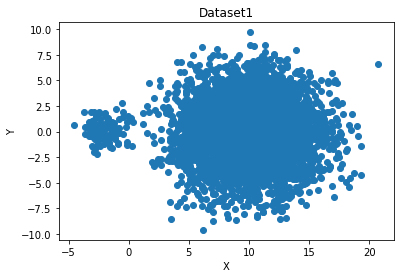

In [ ]:
plt.scatter(x1,y1)
plt.title("Dataset1")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

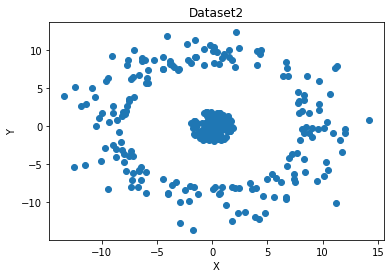

In [ ]:
plt.scatter(x2,y2)
plt.title("Dataset2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

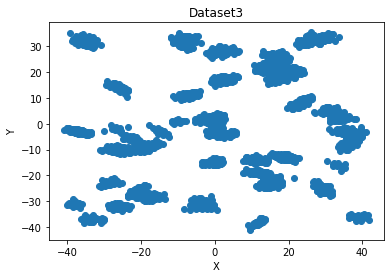

In [ ]:
plt.scatter(x3,y3)
plt.title("Dataset3")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
#kmeans function
from sklearn.metrics import pairwise_distances
def kmeans(X, k, maxiter, seed = None):
    n_row, n_col = X.shape

    # randomly choose k data points as initial centroids
    if seed is not None:
        np.random.seed(seed)
    
    rand_indices = np.random.choice(n_row, size = k)
    centroids = X[rand_indices]

    for itr in range(maxiter):
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(X, centroids, metric = 'euclidean')
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)

        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids = np.array([X[cluster_assignment == i].mean(axis = 0) for i in range(k)])
        
        # if the updated centroid is still the same,
        # then the algorithm converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignment

In [ ]:
centroids1,clusters1=kmeans(dataset1.to_numpy(),3,10)

In [ ]:
centroids1.shape

(3, 2)

## **Finding optimal k for datasets**

# dataset1

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters.

In [135]:
data1=dataset1.to_numpy()

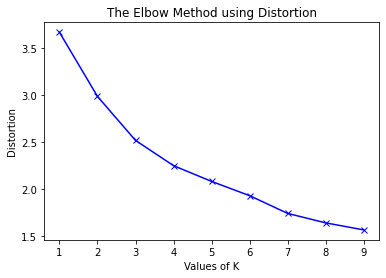

In [ ]:

distortions1=[]
k=range(1,10)
for i in k:
  centers,c=kmeans(data1,i,20)
  distortions1.append(sum(np.min(cdist(data1, centers,'euclidean'), axis=1)) / data1.shape[0])

plt.plot(k, distortions1, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

k=3 is optimal

# dataset2

In [134]:
data2=dataset2.to_numpy()

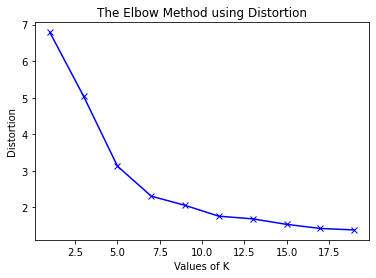

In [ ]:
distortions2=[]
k=range(1,20,2)
for i in k:
  centers2,c2=kmeans(data2,i,10)
  distortions2.append(sum(np.min(cdist(data2, centers2,'euclidean'), axis=1)) / data2.shape[0])

plt.plot(k, distortions2, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

optimal k is between 5 and 9

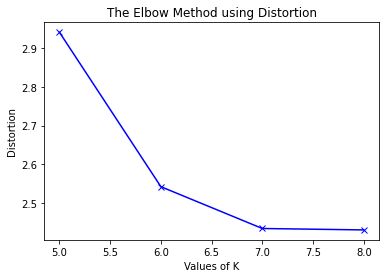

In [ ]:
distortions2=[]
k=range(5,9)
for i in k:
  centers2,c2=kmeans(data2,i,10)
  distortions2.append(sum(np.min(cdist(data2, centers2,'euclidean'), axis=1)) / data2.shape[0])

plt.plot(k, distortions2, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

k=7 is optimal

# dataset3

In [133]:
data3=dataset3.to_numpy()

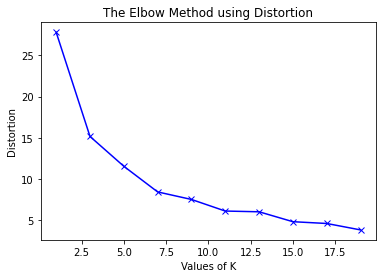

In [ ]:
distortions3=[]
k=range(1,20,2)
for i in k:
  centers3,c3=kmeans(data3,i,20)
  distortions3.append(sum(np.min(cdist(data3, centers3,'euclidean'), axis=1)) / data3.shape[0])

plt.plot(k, distortions3, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

optimal k is 7

## drawing the iterations for specified k

In [ ]:
#given an array of centers and assignments of a data it will draw the scatterplot
def draw(data,centroid,assignment):
  colors=10*["r","g","c","b","k","m","y","pink",'purple','yellow','aqua']
  points=np.concatenate((data,centroid))
  rang=np.zeros(len(data)+len(centroid))
  for c in range(len(centroid)):
    color=colors[c]
    for i in range(len(points)):
      if points[i] in centroid:
        #plotting a centroid
        plt.scatter(points[i][0],points[i][1],color="black",marker='x',s=30)
      elif assignment[i]==c:
        #plotting other points
        plt.scatter(points[i][0],points[i][1],color=color,s=30)
  plt.show()

In [146]:
#drawing the centers at each iteration
def draw_centers(center_arr):
  colors=10*["r","g","c","b","k","m","y","pink",'purple','yellow','aqua']
  for iter in range(len(center_arr)):
    color=colors[iter]
    i=0
    for center in center_arr[iter]:
      if i==0:
        #if it's the first time we see the color
        label='iteration '+str(iter)
      else:
        label='_nolegend_'
      i=i+1
      plt.scatter(center[0],center[1],color=color,s=30,label=label)

    
  plt.legend(bbox_to_anchor=(1.06, 1.06))
  plt.xlabel("evolution of centers by each iteration")
  plt.show()


In [149]:
def draw_centers2(center_arr):
  colors=10*["r","g","c","b","k","m","y","pink",'purple','yellow','aqua']
  for c in range(len(center_arr[0])):
    color=colors[c]
    #i=0
    for iter in range(len(center_arr)):
      #if i==0:
        #if it's the first time we see the color
       # label='iteration '+str(iter)
      #else:
       # label='_nolegend_'
      #i=i+1
      plt.scatter(center_arr[iter][c][0],center_arr[iter][c][1],color=color,s=30)

    
  #plt.legend(bbox_to_anchor=(1.06, 1,06))
  plt.xlabel("evolution of centers in each cluster")
  plt.show()

In [144]:
#edited kmeans function
from sklearn.metrics import pairwise_distances
def kmeans_draw(X, k, maxiter, seed = None):
    error=[]
    center_list=[]
    n_row, n_col = X.shape

    # randomly choose k data points as initial centroids
    if seed is not None:
        np.random.seed(seed)
    
    rand_indices = np.random.choice(n_row, size = k)
    centroids = X[rand_indices]
    iteration=0
    for itr in range(maxiter):
        iteration=iteration+1
        # compute distances between each data point and the set of centroids
        # and assign each data point to the closest centroid
        distances_to_centroids = pairwise_distances(X, centroids, metric = 'euclidean')
        cluster_assignment = np.argmin(distances_to_centroids, axis = 1)



        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids = np.array([X[cluster_assignment == i].mean(axis = 0) for i in range(k)])

        
        # if the updated centroid is still the same,
        # then the algorithm converged
        if np.all(centroids == new_centroids):
            break
        
        
        centroids = new_centroids
        center_list.append(centroids)
        error.append( sum( pow(np.min(cdist(X, centroids,'euclidean'), axis=1),2) ) )
        #print("iteration:"+str(itr))
        #print("centers: "+str(centroids))
    draw(X,centroids,cluster_assignment)
    plt.plot(range(iteration), error, 'bx-')
    plt.xlabel('iteration')
    plt.ylabel('SSE')
    
    plt.show()
    draw_centers(center_list)
    draw_centers2(center_list)
    return centroids, cluster_assignment

# iterations for dataset1

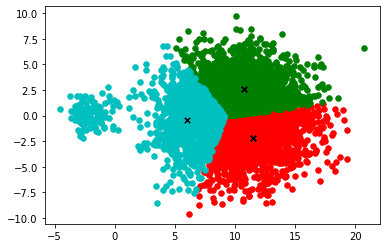

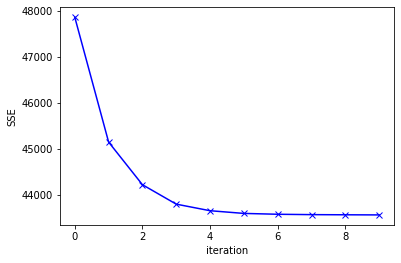

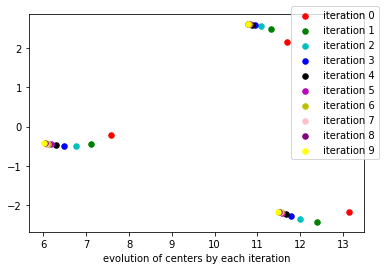

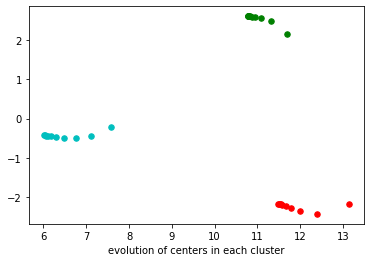

In [150]:
cent,clust=kmeans_draw(data1,3,10)

# iterations for dataset2

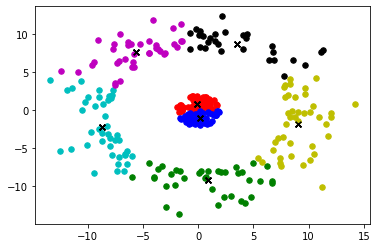

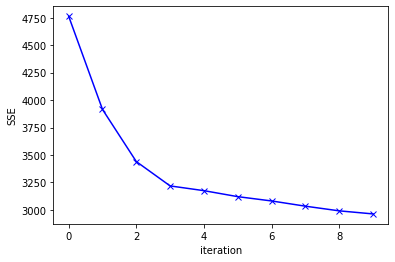

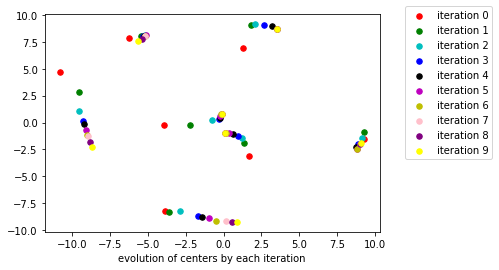

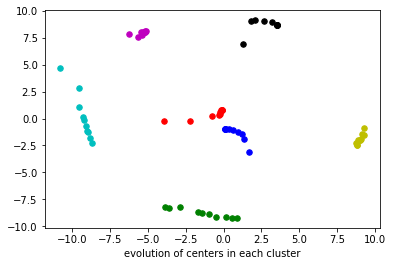

In [151]:
cent,clust=kmeans_draw(data2,7,10)

iterations for dataset3

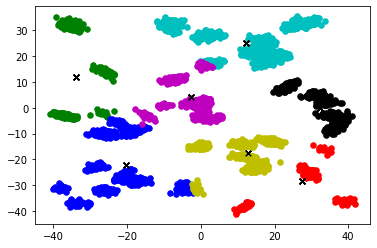

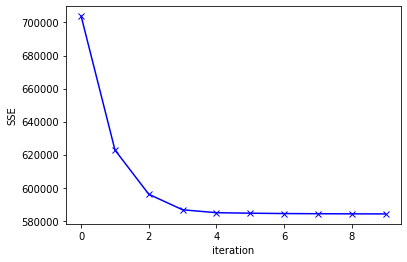

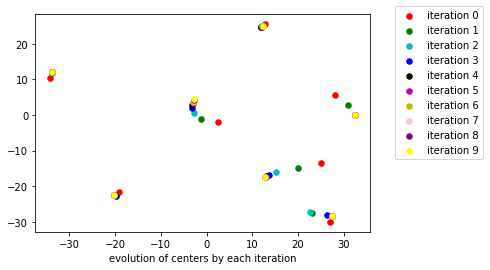

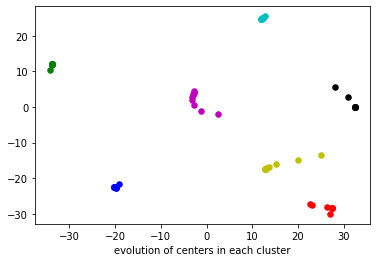

In [158]:
cent,clust=kmeans_draw(data3,7,10)